In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from pprint import pprint

In [2]:
url = 'https://api.covidtracking.com/v1/states/mi/daily.json'
response = (requests.get(url).json())
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# Creating and cleaning DataFrame
covid_df = pd.DataFrame(response)
covid_df.dropna(axis=1, how='all', inplace = True)
del covid_df['hospitalizedIncrease'],covid_df['hash'],covid_df['commercialScore'],covid_df['negativeRegularScore'],covid_df['negativeScore'],covid_df['positiveScore'],covid_df['score'],covid_df['grade']
covid_df = covid_df.drop(columns = ['lastUpdateEt','dateModified','checkTimeEt','recovered','dataQualityGrade','totalTestResultsSource','dateChecked'])
covid_df.head()

,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,death,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestsAntibody,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,deathIncrease
0,20200925,MI,133377,3368935.0,NaN,3502312,558.0,139.0,52.0,7027.0,3537643.0,168708.0,3368935.0,120526,6708.0,319,289151.0,26,1040,38448,3502312,39488,3502312,8
1,20200924,MI,132337,3330487.0,NaN,3462824,558.0,139.0,50.0,7019.0,3498071.0,167584.0,3330487.0,119597,6700.0,319,288257.0,26,1078,36639,3462824,37717,3462824,6
2,20200923,MI,131259,3293848.0,NaN,3425107,501.0,146.0,58.0,7013.0,3460290.0,166442.0,3293848.0,118615,6692.0,321,287162.0,26,902,33327,3425107,34229,3425107,16
3,20200922,MI,130357,3260521.0,NaN,3390878,501.0,146.0,56.0,6997.0,3425958.0,165437.0,3260521.0,117910,6680.0,317,285455.0,26,695,19516,3390878,20211,3390878,16
4,20200921,MI,129662,3241005.0,NaN,3370667,501.0,146.0,64.0,6981.0,3405774.0,164769.0,3241005.0,117406,6665.0,316,285076.0,26,1575,50623,3370667,52198,3370667,12


In [4]:
# Trying to create consistent datetime column ot use with merge.
covid_dates = [datetime.date(int(str(x)[0:4]), int(str(x)[5]), int(str(x)[6:8])) for x in covid_df['date']]
covid_df['datetimes']=covid_dates
covid_df.head()


,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,death,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestsAntibody,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,deathIncrease,datetimes
0,20200925,MI,133377,3368935.0,NaN,3502312,558.0,139.0,52.0,7027.0,3537643.0,168708.0,3368935.0,120526,6708.0,319,289151.0,26,1040,38448,3502312,39488,3502312,8,2020-09-25
1,20200924,MI,132337,3330487.0,NaN,3462824,558.0,139.0,50.0,7019.0,3498071.0,167584.0,3330487.0,119597,6700.0,319,288257.0,26,1078,36639,3462824,37717,3462824,6,2020-09-24
2,20200923,MI,131259,3293848.0,NaN,3425107,501.0,146.0,58.0,7013.0,3460290.0,166442.0,3293848.0,118615,6692.0,321,287162.0,26,902,33327,3425107,34229,3425107,16,2020-09-23
3,20200922,MI,130357,3260521.0,NaN,3390878,501.0,146.0,56.0,6997.0,3425958.0,165437.0,3260521.0,117910,6680.0,317,285455.0,26,695,19516,3390878,20211,3390878,16,2020-09-22
4,20200921,MI,129662,3241005.0,NaN,3370667,501.0,146.0,64.0,6981.0,3405774.0,164769.0,3241005.0,117406,6665.0,316,285076.0,26,1575,50623,3370667,52198,3370667,12,2020-09-21


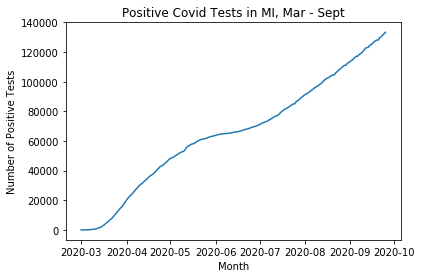

In [5]:
plt.plot(covid_df['datetimes'], covid_df['positive'])
plt.title('Positive Covid Tests in MI, Mar - Sept')
plt.ylabel('Number of Positive Tests')
plt.xlabel('Month')
plt.show()

In [6]:
emp_comb_path = 'Resources/data/Employment Combined - State - Daily.csv'
emp_comb_df = pd.read_csv(emp_comb_path)
mi_emp_comb_df = emp_comb_df.loc[emp_comb_df['statefips']==26] #MI fips is 26
mi_emp_comb_df.head()

,year,month,day,statefips,emp_combined,emp_combined_inclow,emp_combined_incmiddle,emp_combined_inchigh,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,emp_combined_ss70
22,2020,1,15,26,-0.001230,-.000268,-.00115,-0.00255,-.000196,-.00234,.000193,-.00555
73,2020,1,16,26,-0.000679,.000682,-.000624,-0.00245,-.000276,-.0022,.000653,-.00418
124,2020,1,17,26,-0.000132,.00163,-.0000949,-0.00235,-.000307,-.00203,.00112,-.00278
175,2020,1,18,26,0.000427,.00262,.000434,-0.00226,-.000312,-.00186,.00164,-.00117
226,2020,1,19,26,0.000985,.00361,.000963,-0.00216,-.000317,-.00169,.00215,.000433


In [7]:
# Change in employment as percent
mi_emp_comb_df.loc[:, 'emp_combined'] *= 100
mi_emp_comb_df.head().style.format({'emp_combined': '{0:,.5f}%'})

C:\Users\state\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,year,month,day,statefips,emp_combined,emp_combined_inclow,emp_combined_incmiddle,emp_combined_inchigh,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,emp_combined_ss70
22,2020,1,15,26,-0.12300%,-.000268,-.00115,-0.002550,-.000196,-.00234,.000193,-.00555
73,2020,1,16,26,-0.06790%,.000682,-.000624,-0.002450,-.000276,-.0022,.000653,-.00418
124,2020,1,17,26,-0.01320%,.00163,-.0000949,-0.002350,-.000307,-.00203,.00112,-.00278
175,2020,1,18,26,0.04270%,.00262,.000434,-0.002260,-.000312,-.00186,.00164,-.00117
226,2020,1,19,26,0.09850%,.00361,.000963,-0.002160,-.000317,-.00169,.00215,.000433


In [8]:
date = []
per_change = []
#Creating consistent datetime
for index in mi_emp_comb_df.index:
    date.append(datetime.date(mi_emp_comb_df.loc[index, 'year'],mi_emp_comb_df.loc[index, 'month'],mi_emp_comb_df.loc[index, 'day']))
    per_change.append(mi_emp_comb_df.loc[index, 'emp_combined'])
mi_emp_comb_df['datetimes'] = date
mi_emp_comb_df.head()

# Use ttest or anova


#str(mi_emp_comb_df.loc[x,'year'])+ '0'+str(mi_emp_comb_df.loc[x,'month'])

C:\Users\state\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,year,month,day,statefips,emp_combined,emp_combined_inclow,emp_combined_incmiddle,emp_combined_inchigh,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,emp_combined_ss70,datetimes
22,2020,1,15,26,-0.1230,-.000268,-.00115,-0.00255,-.000196,-.00234,.000193,-.00555,2020-01-15
73,2020,1,16,26,-0.0679,.000682,-.000624,-0.00245,-.000276,-.0022,.000653,-.00418,2020-01-16
124,2020,1,17,26,-0.0132,.00163,-.0000949,-0.00235,-.000307,-.00203,.00112,-.00278,2020-01-17
175,2020,1,18,26,0.0427,.00262,.000434,-0.00226,-.000312,-.00186,.00164,-.00117,2020-01-18
226,2020,1,19,26,0.0985,.00361,.000963,-0.00216,-.000317,-.00169,.00215,.000433,2020-01-19


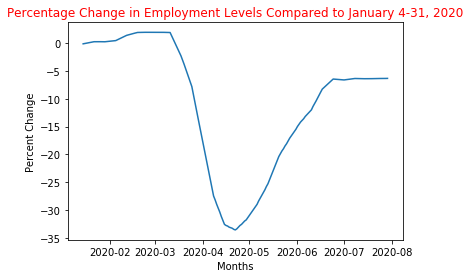

In [9]:
x_values = date
y_values = per_change


plt.plot(x_values, y_values)
plt.xlabel('Months')
plt.ylabel('Percent Change')
plt.title('Percentage Change in Employment Levels Compared to January 4-31, 2020', color = 'red')
plt.show()



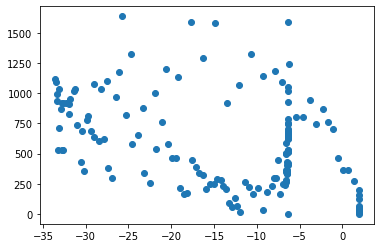

,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,death,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestsAntibody,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,deathIncrease,datetimes,year,month,day,statefips,emp_combined,emp_combined_inclow,emp_combined_incmiddle,emp_combined_inchigh,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,emp_combined_ss70
0,20200729,MI,88974,1704259.0,NaN,1793233,670.0,195.0,135.0,6422.0,1819805.0,115546.0,1704259.0,80172,6172.0,250,210763.0,26,1016,64335,1793233,65351,1793233,1,2020-07-29,2020,7,29,26,-6.34,-.179,-.033,0.0128,-.0685,-.0537,-.107,-.098
1,20200728,MI,87958,1639924.0,NaN,1727882,670.0,195.0,135.0,6421.0,1751875.0,111951.0,1639924.0,79176,6170.0,251,209655.0,26,785,26608,1727882,27393,1727882,16,2020-07-28,2020,7,28,26,-6.35,-.179,-.0333,0.0134,-.0688,-.0544,-.107,-.0988
2,20200727,MI,87173,1613316.0,NaN,1700489,670.0,195.0,113.0,6405.0,1723892.0,110576.0,1613316.0,78507,6154.0,251,208729.0,26,512,29233,1700489,29745,1700489,5,2020-07-27,2020,7,27,26,-6.35,-.179,-.0336,0.0139,-.069,-.0551,-.107,-.0997
3,20200726,MI,86661,1584083.0,NaN,1670744,680.0,210.0,113.0,6400.0,1693712.0,109629.0,1584083.0,78019,6149.0,251,207540.0,26,1589,54509,1670744,56098,1670744,0,2020-07-26,2020,7,26,26,-6.35,-.179,-.034,0.0144,-.0693,-.0559,-.107,-.101
4,20200725,MI,85072,1529574.0,NaN,1614646,751.0,215.0,113.0,6400.0,1637017.0,107443.0,1529574.0,76541,6151.0,249,204810.0,26,0,0,1614646,0,1614646,0,2020-07-25,2020,7,25,26,-6.36,-.179,-.0343,0.0149,-.0696,-.0566,-.106,-.101


In [10]:
covid_emp_merge = pd.merge(covid_df, mi_emp_comb_df, on='datetimes', how = 'inner')

x_values = covid_emp_merge['positiveIncrease']
y_values = covid_emp_merge['emp_combined']
plt.scatter(y_values, x_values)
plt.show()
covid_emp_merge.head()

In [11]:
dol_path = 'Resources/MI_DOL_EMP_STATS.csv'
dol_emp_df = pd.read_csv(dol_path, encoding='UTF-8')
dol_emp_df = dol_emp_df.sort_values(['Period Year (copy)', 'PeriodCode (copy)'] ,ascending=False)
dol_emp_df

,Period Year (copy),PeriodCode (copy),ID,Region,Area,Year,Period,Adjustment,Preliminary,Area Type,Period Type Description,StateSelected,Adjusted,PeriodCode,Prelim,State Code,State Name,Employed,Labor Force,Unemployed,Unemployment Rate
9,2020,8,3403524,MI,Michigan,2020,August,Not Adj,Yes,State,Monthly,True,0,8,1,26,Michigan,"4,502,000","4,941,000","440,000",8.9
41,2020,8,3403525,MI,Michigan,2020,August,Seas. Adj,Yes,State,Monthly,True,1,8,1,26,Michigan,"4,488,000","4,916,000","428,000",8.7
2,2020,7,3403522,MI,Michigan,2020,July,Not Adj,No,State,Monthly,True,0,7,0,26,Michigan,"4,406,000","4,871,000","465,000",9.5
30,2020,7,3403523,MI,Michigan,2020,July,Seas. Adj,No,State,Monthly,True,1,7,0,26,Michigan,"4,395,000","4,817,000","421,000",8.7
27,2020,6,3403521,MI,Michigan,2020,June,Seas. Adj,No,State,Monthly,True,1,6,0,26,Michigan,"4,205,000","4,943,000","738,000",14.9
50,2020,6,3403520,MI,Michigan,2020,June,Not Adj,No,State,Monthly,True,0,6,0,26,Michigan,"4,240,000","4,988,000","748,000",15.0
24,2020,5,3403519,MI,Michigan,2020,May,Seas. Adj,No,State,Monthly,True,1,5,0,26,Michigan,"3,750,000","4,763,000","1,013,000",21.3
47,2020,5,3403518,MI,Michigan,2020,May,Not Adj,No,State,Monthly,True,0,5,0,26,Michigan,"3,773,000","4,765,000","992,000",20.8
21,2020,4,3403517,MI,Michigan,2020,April,Seas. Adj,No,State,Monthly,True,1,4,0,26,Michigan,"3,489,000","4,592,000","1,103,000",24.0
44,2020,4,3403516,MI,Michigan,2020,April,Not Adj,No,State,Monthly,True,0,4,0,26,Michigan,"3,477,000","4,553,000","1,076,000",23.6


Series IDs for BLS datasets
SMU26000000000000001 State and Area Employment, Hours, and Earnings
SMU26000000500000001
SMU26000000500000002
SMU26000000500000011
SMU26000000600000001
SMU26000000600000002
SMU26000000600000011
SMU26000000700000001
SMU26000000800000001
SMU26000000800000002
SMU26000000800000011



In [20]:
#Accessing API based on Documentation, must dig deep into website to find relevant information
# blsApi_url = 'https://api.bls.gov/publicAPI/v2/surveys'


blsApi_url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'
headers = {'Content-type': 'application/json'}
data =  json.dumps({"seriesid": ['SMU26000000000000001', 'SMU26000000500000001', 'SMU26000000500000002', 'SMU26000000500000011', 'SMU26000000600000001', 'SMU26000000600000002', 'SMU26000000600000011', 'SMU26000000700000001', 'SMU26000000800000001', 'SMU26000000800000002', 'SMU26000000800000011'],
                    'catalog':True,
                    "registrationkey" : 'f23d194d295c4c8885c6e64d5e71bc21'})
bls_json = (requests.post(blsApi_url, data=data, headers = headers).json())
# pprint(bls_json['Results']['series'])
# https://www.bls.gov/developers/api_python.htm#python2
pprint(bls_json)

{'Results': {'series': [{'catalog': {'area': 'Michigan',
                                     'commerce_industry': 'Total Nonfarm',
                                     'commerce_sector': 'Total Nonfarm',
                                     'measure_data_type': 'All Employees, In '
                                                          'Thousands',
                                     'seasonality': 'Not Seasonally Adjusted',
                                     'series_id': 'SMU26000000000000001',
                                     'series_title': 'Employed and Office of '
                                                     'Employment and '
                                                     'Unemployment Statistics '
                                                     ': Total Nonfarm - Total '
                                                     'Nonfarm',
                                     'survey_abbreviation': 'SM',
                                     'survey_name': 

                                   'value': '881.65',
                                   'year': '2018'},
                                  {'footnotes': [{}],
                                   'period': 'M05',
                                   'periodName': 'May',
                                   'value': '873.05',
                                   'year': '2018'},
                                  {'footnotes': [{}],
                                   'period': 'M04',
                                   'periodName': 'April',
                                   'value': '876.42',
                                   'year': '2018'},
                                  {'footnotes': [{}],
                                   'period': 'M03',
                                   'periodName': 'March',
                                   'value': '862.50',
                                   'year': '2018'},
                                  {'footnotes': [{}],
                                

                                  {'footnotes': [{}],
                                   'period': 'M07',
                                   'periodName': 'July',
                                   'value': '32.8',
                                   'year': '2020'},
                                  {'footnotes': [{}],
                                   'period': 'M06',
                                   'periodName': 'June',
                                   'value': '32.8',
                                   'year': '2020'},
                                  {'footnotes': [{}],
                                   'period': 'M05',
                                   'periodName': 'May',
                                   'value': '32.9',
                                   'year': '2020'},
                                  {'footnotes': [{}],
                                   'period': 'M04',
                                   'periodName': 'April',
                                   '

In [27]:
#Data Parsing
dframes = {}
# Loop creates dictionary dframes with keys being Commerce Industry + Measure Data Type from metadata and values are pandas dataframes
for series in bls_json['Results']['series']:
    dframes.update({series['catalog']['commerce_industry'] +' '+ series['catalog']['measure_data_type']:pd.DataFrame(series['data'])})
test_df = dframes['Total Nonfarm All Employees, In Thousands']
for df_name, value_df in dframes.items():
    test_df[df_name] = value_df['value']
test_df = test_df.drop(columns=['value', 'latest', 'footnotes'])
test_df

,year,period,periodName,"Total Nonfarm All Employees, In Thousands","Total Private All Employees, In Thousands",Total Private Average Weekly Hours of All Employees,"Total Private Average Weekly Earnings of All Employees, In Dollars","Goods Producing All Employees, In Thousands",Goods Producing Average Weekly Hours of All Employees,"Goods Producing Average Weekly Earnings of All Employees, In Dollars","Service-Providing All Employees, In Thousands","Private Service Providing All Employees, In Thousands",Private Service Providing Average Weekly Hours of All Employees,"Private Service Providing Average Weekly Earnings of All Employees, In Dollars"
0,2020,M08,August,3983.1,3437.0,34.8,958.39,756.4,40.6,1175.37,3226.7,2680.6,33.2,898.39
1,2020,M07,July,3924.8,3398.1,34.4,935.34,750.3,39.8,1125.94,3174.5,2647.8,32.8,879.70
2,2020,M06,June,3889.6,3333.6,34.3,936.73,743.5,39.4,1108.32,3146.1,2590.1,32.8,886.58
3,2020,M05,May,3598.5,3034.5,34.1,955.82,635.3,38.4,1111.68,2963.2,2399.2,32.9,912.98
4,2020,M04,April,3391.2,2798.6,32.6,935.95,539.7,36.7,1088.16,2851.5,2258.9,31.7,901.87
5,2020,M03,March,4380.9,3749.6,33.9,925.13,787.7,40.0,1124.80,3593.2,2961.9,32.3,872.42
6,2020,M02,February,4407.6,3777.4,34.2,931.27,793.9,40.1,1136.03,3613.7,2983.5,32.6,875.96
7,2020,M01,January,4373.6,3763.7,33.6,909.89,795.4,39.7,1117.95,3578.2,2968.3,32.0,855.04
8,2019,M12,December,4464.4,3831.8,34.4,934.99,807.6,40.8,1144.03,3656.8,3024.2,32.8,882.32
9,2019,M11,November,4480.1,3844.0,34.0,917.66,814.3,39.5,1104.82,3665.8,3029.7,32.5,866.78


In [21]:
dframes['Total Nonfarm All Employees, In Thousands']

,year,period,periodName,latest,value,footnotes
0,2020,M08,August,true,3983.1,"[{'code': 'P', 'text': 'Preliminary'}]"
1,2020,M07,July,NaN,3924.8,[{}]
2,2020,M06,June,NaN,3889.6,[{}]
3,2020,M05,May,NaN,3598.5,[{}]
4,2020,M04,April,NaN,3391.2,[{}]
5,2020,M03,March,NaN,4380.9,[{}]
6,2020,M02,February,NaN,4407.6,[{}]
7,2020,M01,January,NaN,4373.6,[{}]
8,2019,M12,December,NaN,4464.4,[{}]
9,2019,M11,November,NaN,4480.1,[{}]
